In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [81]:
CONSTANTS = {
    "width_ticks": 10,
    "length_ticks": 20,
    "local_square_size": 5
}

**Showing the rectangle as square mosaic**

/var/folders/57/fsvvkkm13t382vl7pb83rp800000gn/T/ipykernel_11850/3647812686.py:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


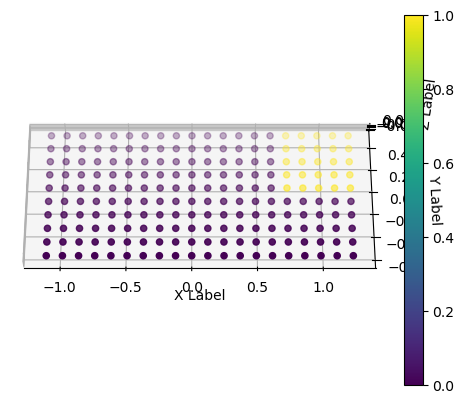

In [82]:
file = np.load("../data/md_h2.npz", allow_pickle=True)
plot_idx = 0
wt = CONSTANTS["width_ticks"]
lt = CONSTANTS["length_ticks"]
lss = CONSTANTS["local_square_size"]
plotting_coords = file["coords"][plot_idx]
squared_coords = plotting_coords.reshape(wt, lt, 3)
squared_coords = squared_coords.reshape(wt // lss, lss, lt // lss, lss, 3)
squared_coords = squared_coords.transpose((0, 2, 1, 3, 4))
squared_coords = squared_coords.reshape((wt * lt // (lss ** 2), lss, lss, 3))
square_idx = 4

# create color encoding for square
colors = [(0, 0, 1), (1, 0, 0)]
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)
color_data = np.zeros(shape=squared_coords.shape[:-1])
color_data[square_idx] = 1
color_data = color_data.reshape((wt // lss, lt // lss, lss, lss))
color_data = color_data.transpose(((0, 2, 1, 3)))
color_data = color_data.reshape(wt // lss, lss, lt // lss, lss)
color_data = color_data.reshape(wt, lt)

plotting_coords_square = plotting_coords[square_idx]
x = plotting_coords.T[0]
y = plotting_coords.T[1]
z = plotting_coords.T[2]
fig = plt.figure()
# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the points
ax.scatter(x, y, z, c=color_data, marker='o', s=20)
# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(60, 270)
ax.set_aspect('equal')
cbar = plt.colorbar(sm)
plt.show()

**Scatter Plot of electron density**

/var/folders/57/fsvvkkm13t382vl7pb83rp800000gn/T/ipykernel_11850/1667171116.py:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


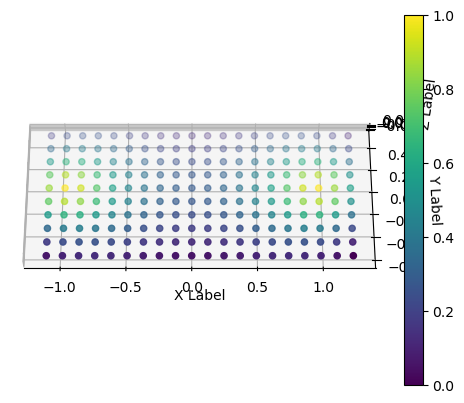

In [83]:
file = np.load("../data/md_h2.npz", allow_pickle=True)
id = 0

plot_points = file["coords"][id]

density = file["densities"][id]
density = density.reshape((wt // lss, lt // lss, lss, lss))
density = density.transpose((0, 2, 1, 3))
density = density.reshape(wt // lss, lss, lt // lss, lss)
density = density.reshape(wt, lt)


#corr_density = np.arange(0, 166, 1)
x = plot_points.T[0]
y = plot_points.T[1]
z = plot_points.T[2]
colormap = plt.get_cmap("viridis")
sm = plt.cm.ScalarMappable(cmap=colormap)
sm.set_array([])

fig = plt.figure()
# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the points
ax.scatter(x, y, z, c=density, cmap=colormap, marker='o', s=20)
# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(60, 270)
ax.set_aspect('equal')
cbar = plt.colorbar(sm)
plt.show()

**Matrix plot of electron density**

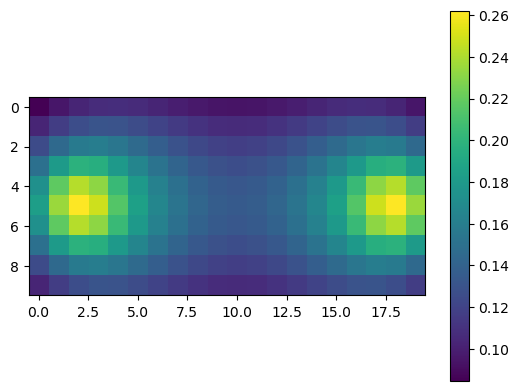

In [84]:
plt.imshow(density, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()

**Matrix Plot of correlation density**

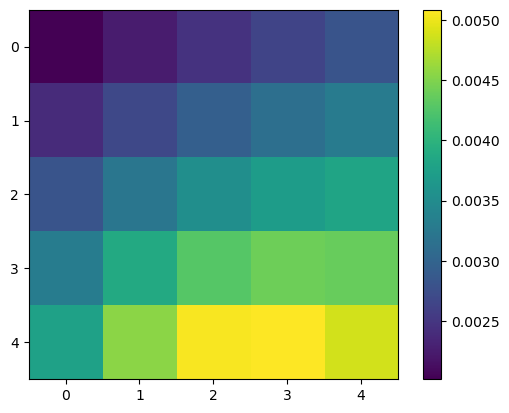

In [85]:
corr = file["corrs"][id]
# choose r1 in rho(r1, r2) always to be at the center of the square
plotting_corr = corr[:, 3, 3, :, :]
plt.imshow(plotting_corr[0], cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()

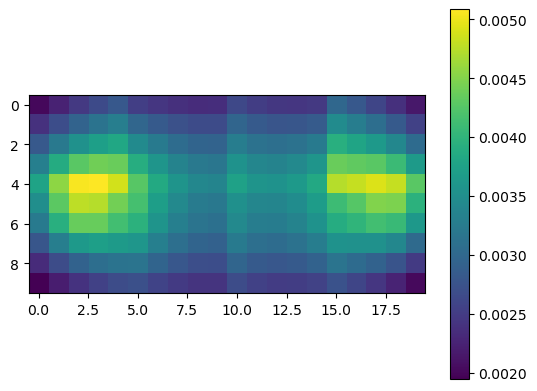

In [86]:
plotting_corr = plotting_corr.reshape((wt // lss, lt // lss, lss, lss))
plotting_corr = plotting_corr.transpose(((0, 2, 1, 3)))
plotting_corr = plotting_corr.reshape(wt // lss, lss, lt // lss, lss)
plotting_corr = plotting_corr.reshape(wt, lt)

plt.imshow(plotting_corr, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()